In [ ]:
!pip install pyvi wordcloud

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.5/8.5 MB 28.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 993.5/993.5 kB 64.9 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [ ]:
with open('./product_train_0.txt', 'r', encoding='utf-8') as file:
    data = file.read().split('\n')
    raw_df = pd.DataFrame([line.split(' ', 1) for line in data], columns=['Label', 'Description'])
raw_df['Label'] = raw_df['Label'].str.replace('__label__', '').str.replace('_', ' ')
raw_df = raw_df.drop(raw_df.index[-1])
raw_df.describe()

,Label,Description
count,14976,14976
unique,1971,14966
top,"Bao đựng, ốp lưng điện thoại",Kệ Tivi KDCN39
freq,342,2


There are descriptions that appear more than once, so we will check out these rows.

In [ ]:
# Use value_counts() to count the occurrences of each value in the column
value_counts = raw_df['Description'].value_counts()

# Filter values that appear more than once
duplicated_values = value_counts[value_counts > 1]

raw_df[raw_df['Description'].isin(duplicated_values.index)].sort_values(by='Description')


,Label,Description
11896,"Mặt nạ, hấp, ủ dưỡng tóc",Chăm Sóc Tóc Từ Thiên Nhiên Cùng Nhà Trà
9957,Tinh dầu chăm sóc tóc,Chăm Sóc Tóc Từ Thiên Nhiên Cùng Nhà Trà
14389,Sản phẩm dành cho da lão hóa,Collagen
3099,"Mặt nạ, hấp, ủ dưỡng tóc",Collagen
12674,Cà phê hạt,Cà phê hạt Arabica
13732,Cà phê phin,Cà phê hạt Arabica
12815,Nhãn dán,Giấy dán nhãn Tomy A4
5532,Giấy,Giấy dán nhãn Tomy A4
13416,Sản phẩm chống nắng toàn thân,Kem – Dưỡng Chất Chống Nắng Tinh Chất Tổ Yến B...
1270,Sản phẩm chống nắng cho da mặt,Kem – Dưỡng Chất Chống Nắng Tinh Chất Tổ Yến B...


As output shown, there are products that labeled 2 different categories.

After having a look at the data, we will preprocess the data before turning them into any "computedable" values for the model.
First step will be filtering out any special character, measurement, product code. We will keep measurement and productcode for later consideration.

In [ ]:
import re
pattern_product_code = r'(\w*\d\w*)'

df = raw_df.copy()
# Extract non word character to another collumn
df['Non word characters'] = df['Description'].str.extractall(pattern_product_code).groupby(level=0)[0].agg(lambda x: ' '.join(x.astype(str)))
# Remove special characters and non word character from the description
df['Description'] = df['Description'].str.replace(r'(\S*\d\S*|[^\w\s]|\b\_\b)', '', regex=True).str.strip()
# Clear empty descriptions to be NaN value
df = df.replace(r'^\s*$', np.nan, regex=True)
df


,Label,Description,Non word characters
0,Ghế văn phòng,Ghế HQ,HK095
1,Thước dây,Thước dây làm bằng sợi thủy tinh TOTAL,30m TMTF12306
2,Cưa tay,Cưa gỗ cầm tay cán lớn Asaki AK,8657
3,"Váy, đầm",Đầm ren cổ V tay ngắn cao cấp,NaN
4,"Dụng cụ đo, kiểm tra khác",Máy đo độ đồng tâm HANN YAN,6401D1
...,...,...,...
14971,Máy làm lạnh nước,Máy làm lạnh nước Orion,RKS1500F
14972,Bàn ghế trang điểm,Bàn phấn MDF,1m2 7706
14973,Bàn phím,Bàn phím Rapoo,V31
14974,Sàn gỗ,Sàn gỗ Morser ly,12 501


As the given data is Vietnamese, that words' syllabes are separated by space, we're gonna use pyvi, a Vietnamese NLP, to join the word's syllabes by "_".


In [ ]:
from pyvi import ViTokenizer
df['Description'] = df['Description'].astype(str)
df['Description'] = df['Description'].apply(ViTokenizer.tokenize)
df

,Label,Description,Non word characters
0,Ghế văn phòng,Ghế HQ,HK095
1,Thước dây,Thước_dây làm_bằng sợi thủy_tinh TOTAL,30m TMTF12306
2,Cưa tay,Cưa gỗ cầm tay cán lớn Asaki AK,8657
3,"Váy, đầm",Đầm ren cổ V tay ngắn cao_cấp,NaN
4,"Dụng cụ đo, kiểm tra khác",Máy đo độ đồng_tâm HANN YAN,6401D1
...,...,...,...
14971,Máy làm lạnh nước,Máy làm lạnh nước Orion,RKS1500F
14972,Bàn ghế trang điểm,Bàn phấn MDF,1m2 7706
14973,Bàn phím,Bàn_phím Rapoo,V31
14974,Sàn gỗ,Sàn gỗ Morser_ly,12 501


Taking out non words character from description ends up in another problem, that could leave description to be NaN or duplicated description, or description labeled more than once.

In [ ]:
# Use value_counts() to count the occurrences of each value in the column
value_counts = df['Description'].value_counts()

# Filter values that appear more than once
duplicated_values = value_counts[value_counts > 1]

df[df['Description'].isin(duplicated_values.index)].sort_values(by='Description')

,Label,Description,Non word characters
5167,MacBook,Apple Macbook_Pro A_Mid Intel Core RAM SSD VGA...,MPXU2B 2017 i5 2 3GHz 8GB 256GB 640 13 3
2704,MacBook,Apple Macbook_Pro A_Mid Intel Core RAM SSD VGA...,MPXU2J 2017 i5 2 3GHz 8GB 256GB 640 13 3
8793,MacBook,Apple Macbook_Pro A_Mid Intel Core RAM SSD VGA...,MPXU2ZP 2017 i5 2 3GHz 8GB 256GB 640 13 3
6861,MacBook,Apple_Macbook A_Mid Intel Core RAM SSD VGA Int...,12 MNYH2ZP 2017 m3 1 2GHz 8GB 256GB 615 12
9994,MacBook,Apple_Macbook A_Mid Intel Core RAM SSD VGA Int...,12 MNYJ2ZP 2017 i5 1 3GHz 8GB 512GB 615 12
...,...,...,...
2130,Ổ cắm điện,Ổ_cắm quay tay pha dây Lioa,3 4 QT3P16CCA 20
3372,Ổn áp,Ổn_Áp Nishu Pha dải điện_áp,3 60KVA 260V 430V
8839,Ổn áp,Ổn_Áp Nishu Pha dải điện_áp,3 20KVA 260V 430V
7849,Ổn áp,Ổn_áp Lioa KVA,5000


We will remove the non word character column and then duplicated row from the dataframe.

In [ ]:
df = df.drop(columns='Non word characters')
df = df[~df.duplicated(keep='first')]
df.describe()

,Label,Description
count,12909,12909
unique,1971,12851
top,"Bao đựng, ốp lưng điện thoại",Ghế cafe giá rẻ
freq,308,3


In [ ]:
# Use value_counts() to count the occurrences of each value in the column
value_counts = df['Description'].value_counts()

# Filter values that appear more than once
duplicated_values = value_counts[value_counts > 1]

df[df['Description'].isin(duplicated_values.index)].sort_values(by='Description')


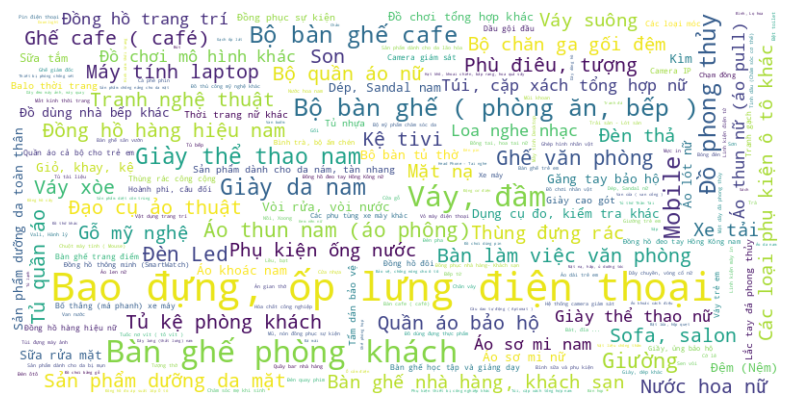

In [ ]:
from wordcloud import WordCloud
# Assuming 'df' is your DataFrame with 'label' column
label_counts = df['Label'].value_counts()

# Choose the top N most frequent labels
top_N = 10
top_labels = label_counts[:top_N]

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(label_counts)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()



In [ ]:
# from sklearn.preprocessing import MultiLabelBinarizer
# ohc_df = df.copy().groupby(by='Description')['Label'].agg(list).reset_index()
# # ohc_df.set_index('Description', inplace=True)
# # ohc_df[ohc_df['Label'].apply(len) > 1]
# mlb = MultiLabelBinarizer()
# label_encoding = mlb.fit_transform(ohc_df['Label'])
# mlb.classes_
# ohc_df = pd.DataFrame(label_encoding, index=ohc_df['Description'], columns=mlb.classes_)
# ohc_df.head()

In [ ]:
import os
if not os.path.exists('data'):
    os.makedirs('data')


In [ ]:
from sklearn.model_selection import train_test_split

X, y = df['Description'], df['Label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
common_labels = set(y_test).intersection(set(y_train))

if len(common_labels) == len(set(y_test)):
    print("All labels in the test set are present in the training set.")
else:
    print("Some labels in the test set are not present in the training set.")


Some labels in the test set are not present in the training set.


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer(analyzer='word', token_pattern=r'\w{1,}')

X_train_count =  count_vect.fit_transform(X_train)
X_test_count = count_vect.transform(X_test)

10968 
 [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vect = TfidfVectorizer(analyzer='word', max_features=15000)

X_train_tfidf =  tfidf_vect.fit_transform(X_train)
X_test_tfidf = tfidf_vect.transform(X_test)

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
encoder.fit(y)
y_train_n = encoder.transform(y_train)
y_test_n = encoder.transform(y_test)

In [ ]:
from sklearn.metrics import accuracy_score, f1_score

def train_model(classifier, X_train, y_train, X_test, y_test, svd=False):
    classifier.fit(X_train, y_train)

    y_pred = classifier.predict(X_test)

    print(f"""
Model {classifier.__class__.__name__} with {"svd" if svd else "no svd"}
    Accuracy: {accuracy_score(y_test, y_pred)}
    Macro F1: {f1_score(y_test, y_pred, average='macro')}
====================================================
    """)

In [ ]:
from sklearn.naive_bayes import MultinomialNB, BernoulliNB

multinomial = MultinomialNB()

train_model(multinomial, X_train_tfidf, y_train_n, X_test_tfidf, y_test_n)


Model MultinomialNB with no svd
    Accuracy: 0.17931835786212239
    Macro F1: 0.03448299943030693    
    


In [ ]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators=100, random_state=42)

train_model(RF, X_train_tfidf, y_train_n, X_test_tfidf, y_test_n)


Model RandomForestClassifier with no svd
    Accuracy: 0.5530596436870643
    


In [ ]:
y_pred = encoder.inverse_transform(RF.predict(X_test_tfidf))
res = pd.DataFrame({'pred': y_pred, 'actual': y_test, 'description': X_test})
res['match'] = (res['pred']==res['actual'])
# res.to_excel('data/res.xlsx', index=True)


In [ ]:
match_count = res.groupby(['pred', 'match']).size().reset_index(name='count')
match_count[match_count['match']==False].sort_values(by='count',ascending=False)

,pred,match,count
634,Son,False,89
423,Mobile,False,19
788,"Váy, đầm",False,17
106,Bộ bàn ghế cafe,False,15
8,"Bao đựng, ốp lưng điện thoại",False,14
...,...,...,...
405,Lắc tay nam,False,1
403,"Lưỡi cưa, lưỡi cắt",False,1
399,Lưới an toàn,False,1
397,Lư hương,False,1


RandomForest model with no config predicted with accuracy 0.553, evaluate the result, we can see that 'Son' is labeled for most false cases.

I assume that unknown labels from X_test is labeled as 'Son'

In [ ]:
res[(res['pred']=='Son') & (res['match']==False)]

,pred,actual,description,match
12420,Son,"Dụng cụ đo, kiểm tra khác",Erasing Shield_Shinwa,False
3398,Son,"Mũ, nón khác",Nón_Biên_Hòa,False
1150,Son,Áo khoác nam,Áo_Khoác_Bomber,False
11457,Son,Trà,Trà_phổ nhĩ chín năm,False
4482,Son,Hóa chất công nghiệp,HEC Mecellose Cellulose_Ether,False
...,...,...,...,...
8819,Son,Thực phẩm hỗ trợ điều trị xương khớp,Sản_phẩm hỗ_trợ điều_trị xương khớp Liquid Glu...,False
96,Son,Tượng thờ,Tượng_Mẫu,False
443,Son,Tranh nghệ thuật,Tranh_Thờ Cửu_Huyền Thất_Tổ,False
4734,Son,"Bình trà, bộ ấm chén",Ấm_tử sa_cổ,False


In [ ]:
least_freq = label_counts[label_counts < 2].index
df[df['Label'].isin(least_freq)]

,Label,Description
55,Thiết bị trình chiếu,Máy_chiếu vật_thể Lumens
76,Cao dán,Miếng dán tan mỡ bụng Đông_Y hộp miếng
137,"Bình thủy, Phích điện",Bình_thủy giữ nhiệt
152,Phụ kiện bảng tương tác,Giá treo bảng tương_tác
156,Cân nhà bếp,Cân điện_tử WH B
...,...,...
14858,Thép cây ( thép thanh ),Thanh sắt thép V đột lỗ
14870,Tất phun,Tất_Phun Hàn_Quốc Stocking_Vớ Da Dạng_Xịt
14904,Bóng rổ,Quả Bóng_Rổ Jatan Cao_Su_Màu
14911,Bia,HB Gift Box Bia đóng_hộp làm_quà tặng sang_trọng
